<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_06_22_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

페이지 107


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

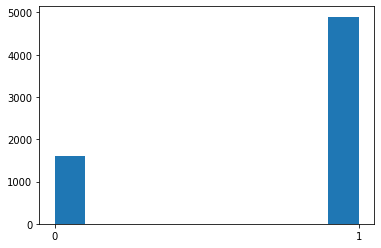

1    4898
0    1599
Name: type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
(6497, 13)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


addr = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red = pd.read_csv(addr, sep=';')

addw = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white = pd.read_csv(addw, sep=';')

print(red.head())
print(white.head())

print(type(red))


red['type'] = 0
white['type'] = 1

print(red.head(2))
print(white.head(2))



#데이터 개수 확인
print(len(red), len(white))

#두개의 데이터 병합
wine = pd.concat([red, white])
print(wine.describe())


#합친 후 데이터 개수 확인
print(len(wine))

#histogram
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())


print (wine.info())

#학습을 위한 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

#학습을 위한 훈련, 검증, 테스트 데이터셋 
#epochs - 오늘 책 한권 보기
#Batch - 오늘 하루 배울 공부량 
#일반화시키기
wine_shuffle = wine_norm.sample(frac=1)
#
wine_np = wine_shuffle.to_numpy()

print(wine_np.shape)


In [2]:
import tensorflow as tf

nTuple = len(wine_np)
print(nTuple)

#80%지점의 index 구함
train_idx = int(nTuple * 0.8)
print(train_idx)

#해당 index보다 작은 범위의 투플들을 모두 가져옴. (Training)
#index보다 작은 모든 튜플들 가져오기 (:train_idx)
#type 속성빼고 그 앞에 잇는 모든 속성들 가져오기 (:-1)
train_X = wine_np[:train_idx, :-1] #입력벡터 12차원
train_Y = wine_np[:train_idx, -1]  #정답

print("트레이닝 데이터: ", train_X.shape, train_Y.shape)

#해당 index보다 큰 범위의 투플들을 모두 가져옴. (Test)
test_X = wine_np[:train_idx, :-1] #입력벡터 12차원
test_Y = wine_np[:train_idx, -1]  #정답

print("테스트 데이터: ", test_X.shape, test_Y.shape)

#one-hot vector로 변환하기 위해 categorical 함수 사용
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
print("one-hot으로 변환", train_Y.shape, test_Y.shape)

#===========학습하기 위한 데이터 split과정이 모두 끝남
#입력레이어 12차원, 첫번째 48뉴련(차원) 두번째 24차원, 세번째 12차원, 출력 2차원
model = tf.keras.Sequential()
#첫번째 레이어
model.add(tf.keras.layers.Dense(48, activation = 'relu', input_shape= (12,)))
#두번째 레이어
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
#세번째 레이어
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
#출력 레이어
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

#======== 모델 정의완료

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07),
              loss = 'categorical_crossentropy', metrics = ['accuracy']
)

#============모델 설정완료
model.summary()

 #실제로 여기서 학습시작
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split = 0.25)

6497
5197
트레이닝 데이터:  (5197, 12) (5197,)
테스트 데이터:  (5197, 12) (5197,)
one-hot으로 변환 (5197, 2) (5197, 2, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9518 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch

# 학습트렌트 가시화  / / 페이지 128

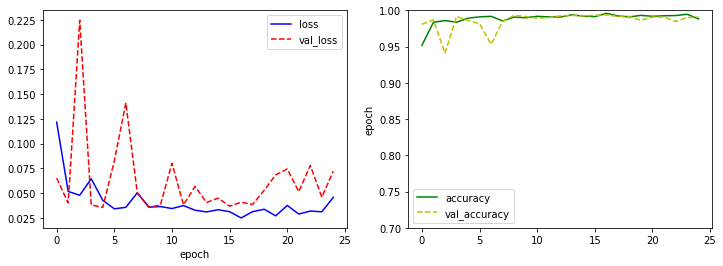

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

# sub 그래프 하나
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()

# sub 그래프 둘
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'y--', label = 'val_accuracy')
plt.ylabel('epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# Softmax 만들어보기  // 페이지 117

1. 확률이 아닌 어떤 값(logits) 들이 주어졌을 때
2. 각 값들이 특성이 두드러졌을때 사용하는것

![대체 텍스트](http://tcpschool.com/examples/images/deep_002.png)

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/9964B8495C820D3608)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[2.00855369e+01 1.48413159e+02 2.71828183e+00 2.20264658e+04]
22197.68277266094
[9.04848363e-04 6.68597532e-03 1.22457910e-04 9.92286718e-01]


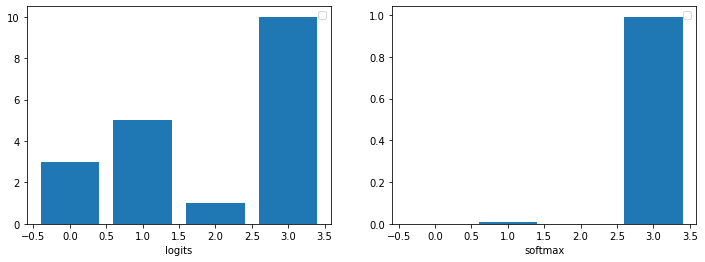

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

#softmax 함수
def softmax(logits):
  exps = np.exp(logits) #exponentials of logits
  sumExps = np.sum(exps) # summation of logits
  P = exps / sumExps #확률
  print(exps)
  print(sumExps)
  print(P)

  return P

#뉴럴네트워크 결과로 나오 값 (logits)
logits = np.array([3, 5, 1, 10])

#함수의 사용
P = softmax(logits)

#graph rendering
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(logits.shape[0]), logits)
plt.xlabel('logits')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(P.shape[0]), P)
plt.xlabel('softmax')
plt.legend()


# 크로스엔트로피 (Categoriacal Cross Entropy) // 페이지 119



# Entropy 구해보기
정보량을 나타냄. 희귀할 수록 (확률(logits)이 낮을수록) 정보량(Entropy)은 증가.




[0.0158422  0.11705891 0.00214401 0.86495488]
[4.14507794 2.14507794 6.14507794 0.14507794]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


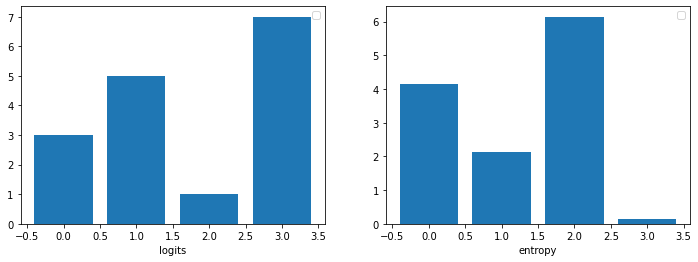

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

print(P)
entropy = -np.log(P)
print(entropy)

#graph rendering
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(logits.shape[0]), logits)
plt.xlabel('logits')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(entropy.shape[0]), entropy)
plt.xlabel('entropy')
plt.legend()



# Entropy의 기댓값

확률이 낮으면 정보량은 많지만, 원래 확률과 가중평균되어서 기대 값은 그리 높지 않을 수 있다.

$ E(x) = -p(x)logP(x) $

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[3 5 1 7] logits
[0.0158422  0.11705891 0.00214401 0.86495488] 확률
[4.14507794 2.14507794 6.14507794 0.14507794] 엔트로피
엔트로피의 기댓값


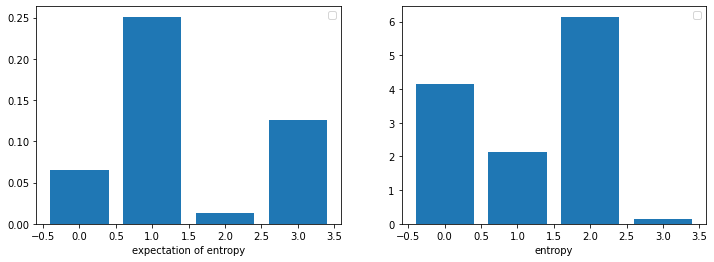

In [ ]:
E = -P * np.log(P)
print(logits, "logits")
print(P, "확률")
print(-np.log(P), "엔트로피")
print("엔트로피의 기댓값")

#graph rendering
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(E.shape[0]), E)
plt.xlabel('expectation of entropy')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(entropy.shape[0]), entropy)
plt.xlabel('entropy')
plt.legend()

# 머신러닝에서 Categorical Cross Entropy (CCE)

$ -\frac {\Sigma p(x) \text{log} q(x)}{J} $ 

J는 클래스 개수, q는 예측된 확률, p는 정답확률

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#softmax 함수
def softmax(logits):
  exps = np.exp(logits) #exponentials of logits
  sumExps = np.sum(exps) # summation of logits
  P = exps / sumExps #확률

  return P 

logits = np.array([3, 12, 1, 7, 4])
#one-hot vector (참값), P(X)
label = np.array([0, 1, 0, 0, 0]) 

#call softmax funtion here
Q = softmax(logits) #q(x)

#Categorical Cross Entropy 구해보기
J = len(label)
CCE = -np.sum(label * np.log(Q)) / J #single value

print(CCE)

0.0014375256267066424
